<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/NEW_MSSC_L02_Critical_Initial_2_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

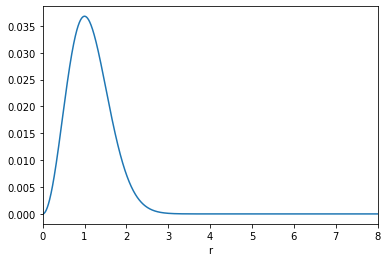

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 30                                                   # Truncation ordem

L0 = 2                                               # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+1]

r1 = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             

r = np.hstack((0, np.flip(r1)))

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+1,N])
rSB = np.zeros([N+1,N])
rrSB = np.zeros([N+1,N])
psi_origin = np.zeros([N+1])
rpsi_origin = np.zeros([N+1])
rrpsi_origin = np.zeros([N+1])

for i in range(N+1):
  psi_origin[i,] = np.sin((2*i+1)*math.pi/2)     # psi(r = 0)

for i in range(N+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r[1:N+1]))                                                  

for i in range(N+1):
  rpsi_origin[i,] = -np.cos((2*i+1)*math.pi/2)*(2*i+1)/L0      # d psi(r = 0)/ dr

for i in range(N+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r[1:N+1]))*(2*i+1)*L0/(r[1:N+1]**2*+L0**2)

for i in range(N+1):
  rrpsi_origin[i,] = -np.sin((2*i+1)*math.pi/2)*(2*i+1)**2/L0**2          # d^2 psi(r = 0)/ dr^2

for i in range(N+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r[1:N+1]))*(2*i+1)**2*L0**2/(r[1:N+1]**4*(1+L0**2/r[1:N+1]**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r[1:N+1]))*(2*i+1)*L0/(r[1:N+1]**3*(1+L0**2/r[1:N+1]**2))-2*np.cos((2*i+1)*np.arctan(L0/r[1:N+1]))*(2*i+1)*L0**3/(r[1:N+1]**5*(1+L0**2/r[1:N+1]**2)**2)                     

# Base function

psi_0 = psi_origin[0:N+1]   
rpsi_0 = rpsi_origin[0:N+1]   
rrpsi_0 = rrpsi_origin[0:N+1]

psi_int = SB[0:N+1,:]        # fora da origem   
rpsi_int = rSB[0:N+1,:]
rrpsi_int = rrSB[0:N+1,:]

psi = np.column_stack((psi_0, psi_int))     # na origem
rpsi = np.column_stack((rpsi_0, rpsi_int))
rrpsi = np.column_stack((rrpsi_0, rrpsi_int))

# Initial conditions of Phi (Scalar field)                                    

r0 = 0


A0 = 0.05  # 0.935155201739-> disperse ; 0.9351552017139; # 0.935155201714  -> colapse       

sigma = 1


Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot)   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()

In [23]:
col

array([ 1.        ,  0.99875692,  0.99503078,  0.98883083,  0.98017249,
        0.96907729,  0.95557281,  0.93969262,  0.92147621,  0.90096887,
        0.87822157,  0.85329088,  0.82623877,  0.79713251,  0.76604444,
        0.73305187,  0.69823682,  0.66168584,  0.6234898 ,  0.58374367,
        0.54254626,  0.5       ,  0.45621066,  0.4112871 ,  0.36534102,
        0.31848665,  0.27084047,  0.22252093,  0.17364818,  0.1243437 ,
        0.07473009,  0.02493069, -0.02493069, -0.07473009, -0.1243437 ,
       -0.17364818, -0.22252093, -0.27084047, -0.31848665, -0.36534102,
       -0.4112871 , -0.45621066, -0.5       , -0.54254626, -0.58374367,
       -0.6234898 , -0.66168584, -0.69823682, -0.73305187, -0.76604444,
       -0.79713251, -0.82623877, -0.85329088, -0.87822157, -0.90096887,
       -0.92147621, -0.93969262, -0.95557281, -0.96907729, -0.98017249,
       -0.98883083, -0.99503078, -0.99875692, -1.        ])

In [2]:
r

array([ 0.        ,  0.14987928,  0.25063252,  0.35265396,  0.45648695,
        0.56271275,  0.67196426,  0.78494216,  0.90243437,  1.02534017,
        1.15470054,  1.29173695,  1.43790208,  1.59494678,  1.76501047,
        1.95074494,  2.15548737,  2.38350719,  2.64036663,  2.93346123,
        3.27285491,  3.67261586,  4.15304279,  4.74456058,  5.49495484,
        6.48384075,  7.8544943 ,  9.89342989, 13.269133  , 19.98698996,
       40.07379578])

In [3]:
a0

array([ 1.88270588e-02, -3.33223270e-03, -1.00634100e-02,  1.01625180e-02,
       -3.19295077e-03, -8.44479548e-04,  6.37619265e-04,  1.62704186e-04,
       -1.14245362e-04, -5.29979470e-05,  1.42130929e-05,  1.63766485e-05,
        1.69812283e-06, -3.57321768e-06, -1.86750408e-06,  1.66191492e-07,
        5.99677346e-07,  2.48036179e-07, -4.71731203e-08, -1.00296733e-07,
       -4.27087575e-08,  6.05870375e-09,  1.73144646e-08,  9.01467412e-09,
        1.82074707e-10, -2.89365790e-09, -2.06223695e-09, -4.57867442e-10,
        4.05460672e-10,  5.03424967e-10,  2.74199876e-10])

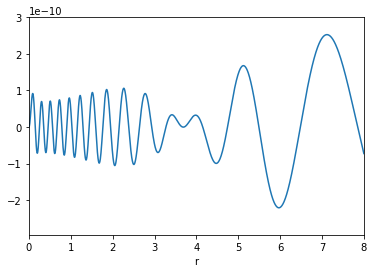

In [4]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()

In [12]:

Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr



Chi=np.dot(c0,psi)
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)
H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2
H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*(rPhi[1:N+1])**2
H0 = np.hstack((H0_0, H0_int))
JH_0 = 8*rChi[0]*rpsi_0 + 4*rrpsi_0 + 8*coeforigin
JH_int = rChi[1:N+1]*rpsi_int + 4*rrpsi_int + 8/r[1:N+1]*rpsi_int  
JH = np.column_stack((JH_0, JH_int))




In [22]:
r

array([ 0.        ,  0.14987928,  0.25063252,  0.35265396,  0.45648695,
        0.56271275,  0.67196426,  0.78494216,  0.90243437,  1.02534017,
        1.15470054,  1.29173695,  1.43790208,  1.59494678,  1.76501047,
        1.95074494,  2.15548737,  2.38350719,  2.64036663,  2.93346123,
        3.27285491,  3.67261586,  4.15304279,  4.74456058,  5.49495484,
        6.48384075,  7.8544943 ,  9.89342989, 13.269133  , 19.98698996,
       40.07379578])

In [21]:
a0

array([ 1.88270588e-02, -3.33223270e-03, -1.00634100e-02,  1.01625180e-02,
       -3.19295077e-03, -8.44479548e-04,  6.37619265e-04,  1.62704186e-04,
       -1.14245362e-04, -5.29979470e-05,  1.42130929e-05,  1.63766485e-05,
        1.69812283e-06, -3.57321768e-06, -1.86750408e-06,  1.66191492e-07,
        5.99677346e-07,  2.48036179e-07, -4.71731203e-08, -1.00296733e-07,
       -4.27087575e-08,  6.05870375e-09,  1.73144646e-08,  9.01467412e-09,
        1.82074707e-10, -2.89365790e-09, -2.06223695e-09, -4.57867442e-10,
        4.05460672e-10,  5.03424967e-10,  2.74199876e-10])

In [71]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr

tol = 1e-30    # tolerance

cnew = c0

# Newton Raphson loop
if min(abs(cnew-c0)) < tol:
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*(rPhi[1:N+1])**2
  H0 = np.hstack((H0_0, H0_int))
  JH_0 = 8*rChi[0]*rpsi_0 + 4*rrpsi_0 + 8*coeforigin
  JH_int = rChi[1:N+1]*rpsi_int + 4*rrpsi_int + 8/r[1:N+1]*rpsi_int  
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0 - np.dot(H0, inv_JH)
  c0 = cnew


#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()

In [72]:
c0

array([6.03418847e-03, 1.51979038e-03, 1.01363230e-03, 5.54929432e-04,
       4.85308047e-04, 3.18452796e-04, 2.84699833e-04, 2.13055438e-04,
       1.88412804e-04, 1.49670606e-04, 1.33507980e-04, 1.09340387e-04,
       9.76964851e-05, 8.18274032e-05, 7.28231894e-05, 6.20341597e-05,
       5.46665996e-05, 4.72517600e-05, 4.08951310e-05, 3.59219950e-05,
       3.01062471e-05, 2.70612427e-05, 2.14579053e-05, 1.99649722e-05,
       1.44739120e-05, 1.40709595e-05, 8.90451693e-06, 8.93320606e-06,
       4.58901243e-06, 4.26459959e-06, 1.32237694e-06])

In [ ]:
# Equation for Krr: momentum constraint





# Initial values of Krr: Base functions of Krr

# In r = 0: 

Krr = np.zeros(N+1)


SB1 = 1/2*(psi[1:(N+1),:] + psi[0:(N),:])          # Com a origem  (30, 31)
rSB1 = 1/2*(rpsi[1:(N+1),:] + rpsi[0:(N),:])
rrSB1 = 1/2*(rrpsi[1:(N+1),:] + rrpsi[0:(N),:])

SB1_int = 1/2*(psi_int[1:(N+1),:] + psi_int[0:(N),:])     # Fora da origem   (30, 30)
rSB1_int = 1/2*(rpsi_int[1:(N+1),:] + rpsi_int[0:(N),:]) 
rrSB1_int = 1/2*(rrpsi_int[1:(N+1),:] + rrpsi_int[0:(N),:]) 

# Base functions for Beta

SB2 = np.zeros([N,N])      
rSB2 = np.zeros([N,N])
rrSB2 = np.zeros([N,N])
SB2_origin = np.zeros([N])
rSB2_origin = np.zeros([N])
rrSB2_origin = np.zeros([N])

for i in range(N):
  SB2_origin[i,] = np.sin((2*(i+1/2)+1)*math.pi/2)       # psi(r = 0)

for i in range(N):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r[1:N+1]))                                                  

for i in range(N):
  SB2_origin[i,] = -np.cos((2*i+2)*math.pi/2)*(2*i+2)/L0      # d psi(r = 0)/ dr

for i in range(N):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r[1:N+1]))*(2*i+2)*L0/(r[1:N+1]**2*(1+L0**2/r[1:N+1]**2))

for i in range(N):
  rrSB2_origin[i,] = -np.sin((2*i+2)*math.pi/2)*(2*i+2)**2/L0**2 

for i in range(N):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r[1:N+1]))*(2*i+2)**2*L0**2/(r[1:N+1]**4*(1+L0**2/r[1:N+1]**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r[1:N+1]))*(2*i+2)*L0/(r[1:N+1]**3*(1+L0**2/r[1:N+1]**2))-2*np.cos((2*i+2)*np.arctan(L0/r[1:N+1]))*(2*i+2)*L0**3/(r[1:N+1]**5*(1+L0**2/r[1:N+1]**2)**2)



SB2 = np.column_stack((SB2_origin, SB2))
rSB2 = np.column_stack((rSB2_origin, rSB2))
rrSB2 = np.column_stack((SB2_origin, rrSB2))


SB2_int = SB2[:, 1:N+1]
rSB2_int = SB2[:, 1:N+1]
rrSB2_int = SB2[:, 1:N+1]





In [ ]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]

#qpsiK = np.column_stack((psi_origin, qSB))
#rqpsiK = np.column_stack((rpsi_origin, qrSB))
#rrqpsiK = np.column_stack((rrpsi_origin, qrrSB))


qSB1 = 1/2*(qSB[1:(N+1),:] + qSB[0:(N),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+1),:] + qrSB[0:(N),:])
rrqSB1 = 1/2*(qSB[1:(N+1),:] + qrrSB[0:(N),:])

qSB1_I = qSB[:, 1:N+1]
rqSB1_I = qSB[:, 1:N+1]
rrqSB1_1 = qSB[:, 1:N+1]

# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [ ]:
rrpsi_0

array([-2.5000e-01,  2.2500e+00, -6.2500e+00,  1.2250e+01, -2.0250e+01,
        3.0250e+01, -4.2250e+01,  5.6250e+01, -7.2250e+01,  9.0250e+01,
       -1.1025e+02,  1.3225e+02, -1.5625e+02,  1.8225e+02, -2.1025e+02,
        2.4025e+02, -2.7225e+02,  3.0625e+02, -3.4225e+02,  3.8025e+02,
       -4.2025e+02,  4.6225e+02, -5.0625e+02,  5.5225e+02, -6.0025e+02,
        6.5025e+02, -7.0225e+02,  7.5625e+02, -8.1225e+02,  8.7025e+02,
       -9.3025e+02])

In [ ]:
psi_0

array([ 1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,
       -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,
        1., -1.,  1., -1.,  1.])

In [ ]:
# Runge Kutta 4th order

h = 0.001   # step size
tf = 4

It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0

Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

V = 0

#matriz = np.concatenate((array1, array2))

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi[1:N+1]*SB1_int + rSB1_int + 3/r[1:N+1]*SB1_int   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi_0 + 2*coeforigin - np.exp(4*Chi[0]) * Pi[0]**2*psi_0
  Matrix_Alpha_int = rrpsi_int + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi_int - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi_int - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi_int 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2_int - SB2_int/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_origin.append(1 + np.dot(al0, psi_0))  # = Alphacenter in matlab
#  print(Alpha_origin)
  
  # Phi origin:  
  phi_origin.append(np.dot(a0, psi_0))
#  print(phi_origin)
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1_int + rSB1_int + 3/r[1:N+1]*SB1_int   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  
  Krr = np.dot(ck0, SB1)                 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi_0 + 2*coeforigin - np.exp(4*Chi[0]) * Pi[0]**2*psi_0
  Matrix_Alpha_int = rrpsi_int + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi_int - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi_int - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi_int 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2_int - SB2_int/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi) 
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)     
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1_int + rSB1_int + 3/r[1:N+1]*SB1_int   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (30,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  
  Krr = np.dot(ck0, SB1)             # shapes (30,) and (31,31) not aligned: 30 (dim 0) != 31 (dim 0)         
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi_0 + 2*coeforigin - np.exp(4*Chi[0]) * Pi[0]**2*psi_0
  Matrix_Alpha_int = rrpsi_int + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi_int - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi_int - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi_int 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2_int - SB2_int/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi) 
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1_int + rSB1_int + 3/r[1:N+1]*SB1_int  # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (30,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  
  Krr = np.dot(ck0, SB1)             # shapes (30,) and (31,31) not aligned: 30 (dim 0) != 31 (dim 0)         
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi_0 + 2*coeforigin - np.exp(4*Chi[0]) * Pi[0]**2*psi_0
  Matrix_Alpha_int = rrpsi_int + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi_int - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi_int - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi_int 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2_int - SB2_int/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)  
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
  #print(t) 
#  if t > 9:
#    h=0.0001

    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 

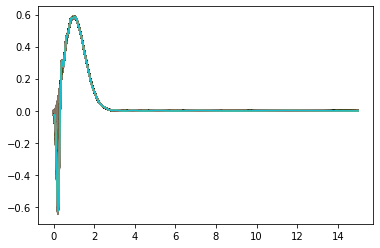

In [ ]:
for i in range(It):
  plt.plot(rplot, phi_set[i])

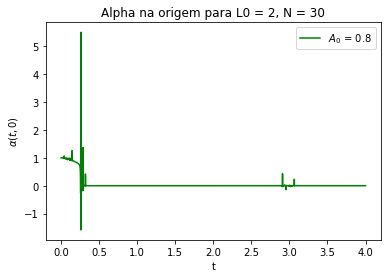

In [ ]:
# Searching for critical amplitude:

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 2, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.legend()

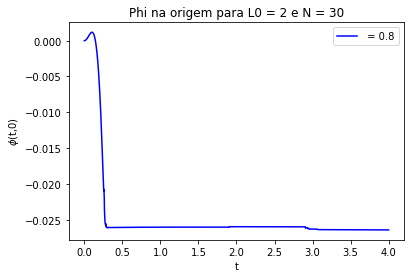

In [ ]:
plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.legend() 

In [ ]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.title("log(L2HC) para $N = 600$, $L_0 = 2$ e A_0 = {:}".format(A0))